参考资料：<br>
白话word2vec：https://zhuanlan.zhihu.com/p/81032021 <br>
什么是词向量？https://blog.csdn.net/mawenqi0729/article/details/80698350 <br>
官方参数解读：https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.html#gensim.models.Word2Vec <br>
为什么PCA：https://zhuanlan.zhihu.com/p/37810506 <br>
https://blog.csdn.net/HLBoy_happy/article/details/77146012 <br>
参数解读博客版：https://blog.csdn.net/xiaoQL520/article/details/102509477 <br>
负采样：https://zhuanlan.zhihu.com/p/144146838 <br>
更多资料：https://zhuanlan.zhihu.com/p/26306795 <br>
https://mp.weixin.qq.com/s/j8JPMZSPoVT_hQswX5QVxA

In [1]:
import jieba
import re
import numpy as np
from sklearn.decomposition import PCA
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import matplotlib

## 分词

In [2]:
stopwords = stopwordslist(filepath)

NameError: name 'stopwordslist' is not defined

In [3]:
f = open("sanguo.txt", 'r',encoding='utf-8') #读入文本
lines = []
for line in f: #分别对每段分词
    temp = jieba.lcut(line)  #结巴分词 精确模式
    words = []
    for i in temp:
        #过滤掉所有的标点符号
        i = re.sub("[\s+\.\!\/_,$%^*(+\"\'””《》]+|[+——！，。？、~@#￥%……&*（）：；‘]+", "", i)
        if len(i) > 0 :
            words.append(i)
    if len(words) > 0:
        lines.append(words)
print(lines[0:5])#预览前5行分词结果

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\fatak\AppData\Local\Temp\jieba.cache
Loading model cost 0.482 seconds.
Prefix dict has been built successfully.


[['三国演义', '上卷'], ['罗贯中'], ['滚滚', '长江', '东', '逝水', '浪花', '淘尽', '英雄', '是非成败', '转头', '空', '青山', '依旧', '在', '几度', '夕阳红'], ['白发', '渔樵', '江渚上', '惯看', '秋月春风', '一壶', '浊酒', '喜相逢', '古今', '多少', '事', '都', '付笑谈', '中'], ['--', '调寄', '临江仙']]


In [5]:
len(lines[0])


2

## 模型训练 

In [4]:
# 调用Word2Vec训练
# 参数：size: 词向量维度；window: 上下文的宽度，min_count为考虑计算的单词的最低词频阈值
model = Word2Vec(lines,vector_size = 20, window = 2 , min_count = 3, epochs=7, negative=10,sg=1)
print("孔明的词向量：\n",model.wv.get_vector('孔明'))
print("\n和孔明相关性最高的前20个词语：")
model.wv.most_similar('孔明', topn = 20)# 与孔明最相关的前20个词语

孔明的词向量：
 [ 0.30918598 -0.25399044  0.53894365  0.02905242  0.55802447 -0.48933303
  0.4155122   1.3916336  -0.2485598   0.9416046   0.60204756 -0.3325588
 -0.00140332 -0.84826267  0.82009554  0.6920753   0.18256369  0.00915834
 -0.62063736 -0.5736527 ]

和孔明相关性最高的前20个词语：


[('先主', 0.9293667674064636),
 ('玄德', 0.9247310161590576),
 ('周瑜', 0.9022732973098755),
 ('关公', 0.8862025141716003),
 ('陆逊', 0.8781594634056091),
 ('使者', 0.8681081533432007),
 ('维', 0.866155207157135),
 ('孙权', 0.866130530834198),
 ('后主', 0.8592091798782349),
 ('孙夫人', 0.8582034707069397),
 ('袁术', 0.8449896574020386),
 ('二嫂', 0.8432561755180359),
 ('鲁肃', 0.8385230302810669),
 ('心中', 0.8345033526420593),
 ('魏主', 0.8330606818199158),
 ('门吏', 0.8330453038215637),
 ('吕布', 0.8320356011390686),
 ('庞统', 0.8304045796394348),
 ('土人', 0.8266873359680176),
 ('孙策', 0.8240634202957153)]

## 可视化 

In [5]:
# 将词向量投影到二维空间
rawWordVec = []
word2ind = {}
for i, w in enumerate(model.wv.index_to_key): #index_to_key 序号,词语
    rawWordVec.append(model.wv[w]) #词向量
    word2ind[w] = i #{词语:序号}
rawWordVec = np.array(rawWordVec)
X_reduced = PCA(n_components=2).fit_transform(rawWordVec) 

In [27]:
rawWordVec #降维之前20维

array([[-0.05006231,  0.02714986,  0.5879498 , ...,  0.05121573,
        -0.7616673 , -1.3202841 ],
       [ 0.01672019,  0.7342503 ,  0.37551335, ..., -0.83772415,
        -1.0496975 , -0.71028405],
       [-0.6414835 ,  0.72010225, -0.46660313, ..., -0.93404883,
        -1.4007665 ,  0.09761711],
       ...,
       [-0.04773688,  0.22252676,  0.02831157, ..., -0.245158  ,
        -0.5127942 , -0.26979887],
       [ 0.00191441,  0.16574684,  0.04898631, ..., -0.24113323,
        -0.45734584, -0.28465194],
       [-0.07596518,  0.15542716, -0.00880657, ..., -0.2921225 ,
        -0.44197667, -0.23623456]], dtype=float32)

In [7]:
X_reduced.shape #降维之后2维

(12481, 2)

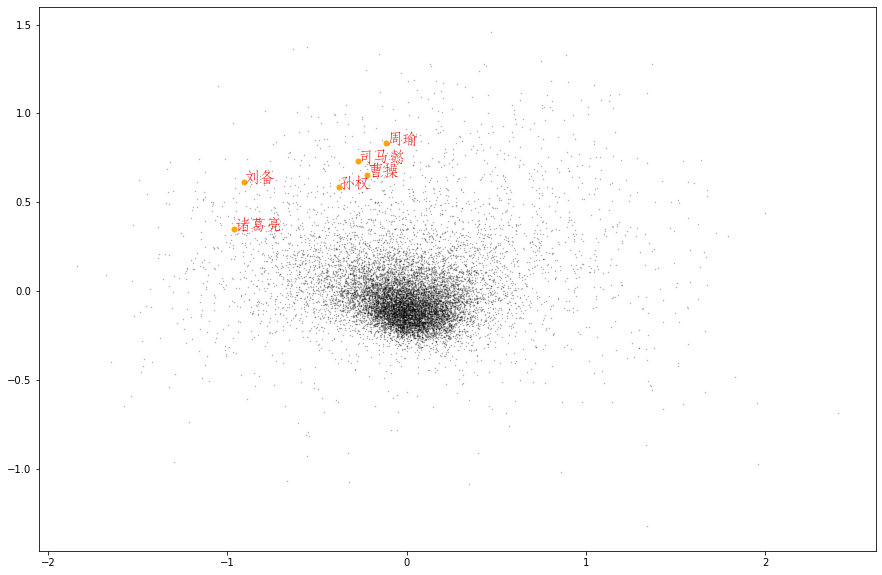

In [6]:
# 绘制星空图
# 绘制所有单词向量的二维空间投影
fig = plt.figure(figsize = (15, 10))
ax = fig.gca()
ax.set_facecolor('white')
ax.plot(X_reduced[:, 0], X_reduced[:, 1], '.', markersize = 1, alpha = 0.3, color = 'black')


# 绘制几个特殊单词的向量
words = ['孙权', '刘备', '曹操', '周瑜', '诸葛亮', '司马懿','汉献帝']

# 设置中文字体 否则乱码
zhfont1 = matplotlib.font_manager.FontProperties(fname='./华文仿宋.ttf', size=16)
for w in words:
    if w in word2ind:
        ind = word2ind[w]
        xy = X_reduced[ind]
        plt.plot(xy[0], xy[1], '.', alpha =1, color = 'orange',markersize=10)
        plt.text(xy[0], xy[1], w, fontproperties = zhfont1, alpha = 1, color = 'red')

## 类比关系实验

In [30]:
# 玄德－孔明＝？－曹操
words = model.wv.most_similar(positive=['玄德', '曹操'], negative=['孔明'])
words

[('袁绍', 0.8362736701965332),
 ('回见', 0.7864560484886169),
 ('樊城', 0.7807648181915283),
 ('袁术', 0.7787541151046753),
 ('徐州', 0.7728785276412964),
 ('提兵', 0.7600228190422058),
 ('雒城', 0.7568132877349854),
 ('长安', 0.7497242093086243),
 ('成都', 0.7474355101585388),
 ('袁尚', 0.7465431690216064)]

In [31]:
# 曹操－魏＝？－蜀
words = model.wv.most_similar(positive=['曹操', '蜀'], negative=['魏'])
words

[('栅', 0.6846626996994019),
 ('早有', 0.6342679858207703),
 ('孙策', 0.6305856108665466),
 ('细作', 0.6208207607269287),
 ('前', 0.6149543523788452),
 ('祁山', 0.5972427129745483),
 ('五路', 0.5865857005119324),
 ('袁绍', 0.5816951990127563),
 ('马报', 0.5799976587295532),
 ('孙权', 0.5787743330001831)]